In [1]:
import matplotlib.pyplot as plt
import numpy as np

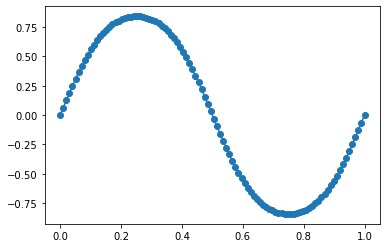

In [4]:
t = np.linspace(0, 1, num=100)
wavetable = np.sin(np.sin(2 * np.pi * t))
plt.plot(t, wavetable, '-o')

In [5]:
# Function to implement wavetable synthesis principle
def synthesize(sampling_speed, wavetable, n_samples):
    '''Synthesize new waveform from the existing table
    It uses the concept of fast and slow pointers'''
    samples = []
    current_sample = 0
    while len(samples) < n_samples:
        current_sample += sampling_speed
        current_sample = current_sample % wavetable.size
        samples.append(wavetable[current_sample])
        current_sample += 1
    return np.array(samples)

In [7]:
sample1 = synthesize(1, wavetable, 300)
sample2 = synthesize(2, wavetable, 300)

Text(0.5, 0, 'Sample Number')

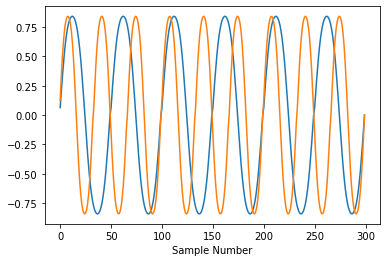

In [8]:
plt.plot(sample1)
plt.plot(sample2)
plt.xlabel('Sample Number')

The waveforms look similar, but one of them has a higher frequency than the other
Using this, we'll generate a new wavetable designed for a sampling rate of 8 kHz

In [9]:
fs = 8000

In [11]:
t = np.linspace(0, 1, num = fs)
wavetable = np.sin(np.sin(2 * np.pi * t))

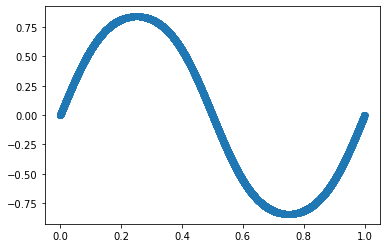

In [12]:
plt.plot(t, wavetable, '-o')

We'll generate two sinusoidal waves at 220 Hz and 440 Hz

In [13]:
sample1 = synthesize(220, wavetable, 2*fs)
sample2 = synthesize(440, wavetable, 2*fs)

We can listen to the audio from IPython

In [ ]:
from IPython.display import Audio

In [15]:
Audio(sample1, rate=fs)

In [16]:
Audio(sample2, rate=fs)

The sampling scheme works, sample2 has a higher frequency than sample1

We'll generate a more complex sound, from a triangular shape

In [24]:
wavetable = t * (t < 0.5) + (-(t - 1)) * (t >= 0.5)

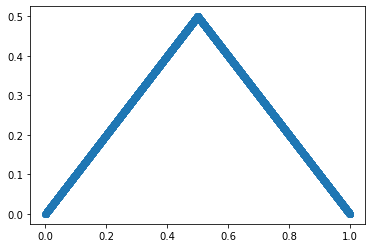

In [25]:
plt.plot(t, wavetable, '-o')

In [26]:
sample1 = synthesize(220, wavetable, 2*fs)
sample2 = synthesize(440, wavetable, 2*fs)

In [27]:
Audio(sample1, rate=fs)

In [28]:
Audio(sample2, rate=fs)

Or a more complex waveform based on sum of sine waves

In [38]:
def make_sine_wavetable(n_samples, amps, phases, freqs):
    t = np.linspace(0, 1, num=n_samples)
    wavetable = np.zeros_like(t)
    for amp, phase, freq in zip(amps,
                                   phases,
                                   freqs):
        wavetable += amp * np.sin(np.sin(2 * np.pi* freq * t + phase)) + \
                        amp / 2 * np.sin(np.sin(2 * np.pi* 2 * freq * t + phase))
    return wavetable

In [39]:
wavetable = make_sine_wavetable(t.size, [0.1, 0.5, 0.8, 0.3],
                                        [0, 0.3, 0.4, 0.7],
                                        [1, 2.1, 3, 4.3])

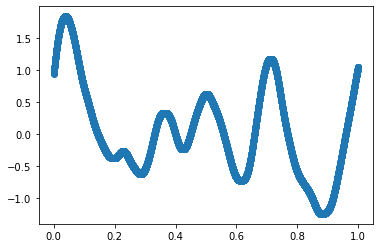

In [40]:
plt.plot(t, wavetable, '-o')

In [41]:
sample1 = synthesize(220, wavetable, 2*fs)
sample2 = synthesize(440, wavetable, 2*fs)

In [42]:
Audio(sample1, rate=fs)

In [43]:
Audio(sample2, rate=fs)